In [141]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import integrate

# Clase para definir la Ecuacion de Schrodinger Independiente del Tiempo
# Se solucionara en dos 'partes', una que vendra solucionando desde la izquierda y otra desde la derecha.
# En el punto de encuentro de ambas soluciones, si la energia es un eigenvalor de la funcion 
# de onda la grafica coincidira y se tendra una solucion aproximada de la ecuacion de Schrodinger.
# Esto numericamente se mide con la derivada logaritmica, entre menor sea la diferencia entre las derivadas
# logaritmicas de las soluciones izquierda y derecha se tendra una mejor solucion.
class SETI():
    
#   Se  inicializan las propiedades
    def __init__( self , V, v, x1, x2, E, a, par ):
#       Los x1  y x2 hacen referencia al dominio de la ecuacion de onda en el que se trabajara
        self.x1 = x1
        self.x2 = x2
        
#       El potencial
        potencial1 = v(x1)
        potencial2 = v(x2)
        self.pot = np.append(potencial1, np.flip(potencial2))
        
#       Para definir si es la solucion par o impar se cambian los valores iniciales. 
# np.exp(-0.0483*np.abs(E))])
        if (par==True) :
            self.psi0l = np.array([0, 1])
            self.psi0d = np.array([0, -1])
        else:
            self.psi0l = np.array([0, -1])
            self.psi0d = np.array([0, -1])
            
#       Energia
        self.energy = E
    
#       Potencial para usar en el ODEInt
        self.V  = V
        
#   Ecuacion para pasarle al ODEInt    
    def equation( self, psi, x, E, V, a ):
        if (np.abs(x)<a/2):
            return np.array( [psi[1], -0.0483*(self.energy-V(x))*psi[0]] )
        else:
            return np.array( [psi[1], -0.0483*self.energy*psi[0]] )
        
#  Solucion numerica de la ecuacion junto con el error al usar esa energia
    def sol( self ):
        psil = odeint(self.equation, self.psi0l, self.x1, args=(self.energy, self.V, a))
        psid = odeint(self.equation, self.psi0d, self.x2, args=(self.energy, self.V, a))

        psi = np.append(psil[:,0], np.flip(psid[:,0]))
        psidot =  np.append(psil[:,1], np.flip(psid[:,1]))
    
        logderl=psil[len(psil[:,1])-1][1]/psil[len(psil[:,0])-1][0]
        logderd=psil[len(psid[:,1])-1][1]/psid[len(psil[:,0])-1][0]
    
        diferencia = np.abs( (logderl - logderd) / (logderl + logderd) )

        return (psi, psidot, diferencia)
    
    def modulo(self):
        a = np.abs(self.sol()[0])**2
        newArray=np.fromiter((element for element in a if element!=0),dtype=a.dtype)
        I1 = integrate.simpson(newArray)
        return I1**(0.5)
    
    def funOnda(self):
        return self.sol()[0]/self.modulo()
    
    def denProb(self):
        return np.abs(self.funOnda())**2
    
#     Grafica de la solucion
    def graphFunOnda( self ):
        x = np.append(x1, np.flip(x2))
        plt.plot(x, self.funOnda())
#         plt.plot(x, self.pot)
        plt.xlim(-15,15)
        plt.xlabel('Posicion')
        plt.ylabel('Funcion de Onda')
        plt.title('E = %.2f' %self.energy)
        plt.grid() 
        plt.show()
        
    def graphDenProb(self):
        x = np.append(x1, np.flip(x2))
        plt.plot(x, self.denProb())
        plt.xlabel('Posicion')
        plt.ylabel('Densidad Probabilidad')
        plt.title('E = %.2f' %self.energy)
        plt.xlim(-15,15)
        plt.grid()
        plt.show()
        
class SETD():
    
    def __init__( self, t ):
        self.t = t
        
    def funOndaDep(self, E1, E2, E3, E4, V, v, x1, x2, a ):
        psi1 = SETI( V, v, x1, x2, E1,a, True )
        psi2 = SETI( V, v, x1, x2, E2,a, False )
        psi3 = SETI( V, v, x1, x2, E3,a, True )
        psi4 = SETI( V, v, x1, x2, E4,0, False )
        
        psi1t = psi1.modulo()*psi1.funOnda()*np.exp(complex(0,-E1*self.t/(6.582e-6)))
        psi2t = psi2.modulo()*psi2.funOnda()*np.exp(complex(0,-E2*self.t/(6.582e-6)))
        psi3t = psi3.modulo()*psi3.funOnda()*np.exp(complex(0,-E3*self.t/(6.582e-6)))
        psi4t = psi4.modulo()*psi4.funOnda()*np.exp(complex(0,-E4*self.t/(6.582e-6)))
        
        return(psi1t+psi2t+psi3t+psi4t)
    
    def denProbDep(self, E1, E2, E3, E4, V, v, x1, x2,a):
        a = np.abs(self.funOndaDep(E1, E2, E3, E4, V, v, x1, x2,a))**2
        newArray=np.fromiter((element for element in a if element!=0),dtype=a.dtype)
        I1 = integrate.simpson(newArray)
        I1 = I1**0.5
        return np.abs(self.funOndaDep(E1, E2, E3, E4, V, v, x1, x2,a)/I1)**2
    
    def graphDenProbDep(self, E1, E2, E3, E4, V, v, x1, x2,a):
        x = np.append(x1, np.flip(x2))
        plt.plot(x, self.denProbDep(E1, E2, E3, E4, V, v, x1, x2,a))
        plt.xlabel('Posicion')
        plt.ylabel('Densidad Probabilidad')
        plt.xlim(-5,5)
        plt.title('t = %.2f' %self.t)
        plt.grid()
        plt.show()

In [136]:
V0 = -250
a = 2
x1 = np.linspace(-100, 2, 10000)
x2 = np.linspace(100, 2, 10000)
# E = 31

def V(x):
    if np.abs(x)<=(a/2):
        return V0
    else:
        return 0
    

def v(x):
    potencial = np.array([ ])
    for i in range(0, len(x)):
        if np.abs(x[i])<=(a/2):
            potencial = np.append(potencial, V0)
        else:
            potencial = np.append(potencial, 0)
    return potencial

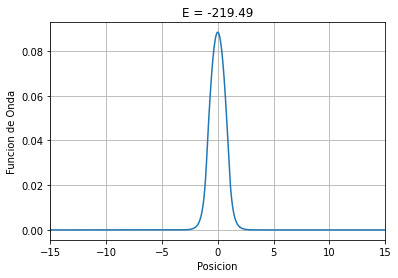

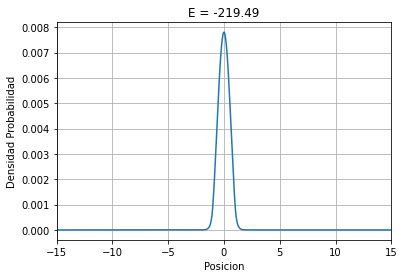

In [137]:
psi1 = SETI( V, v, x1, x2, -219.49, a, True )
psi1.graphFunOnda()
psi1.graphDenProb()

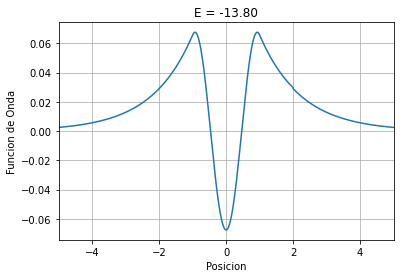

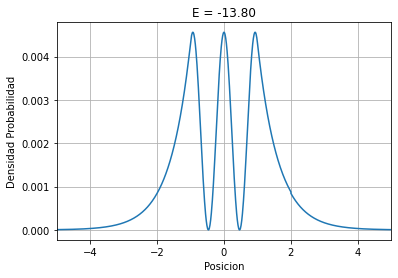

In [5]:
psi2 = SETI( V, v, x1, x2, -13.8, a, True )
psi2.graphFunOnda()
psi2.graphDenProb()

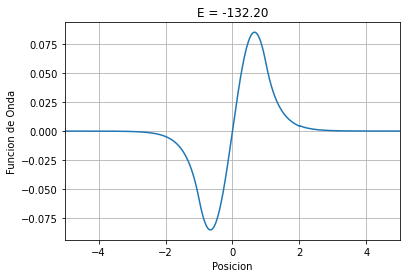

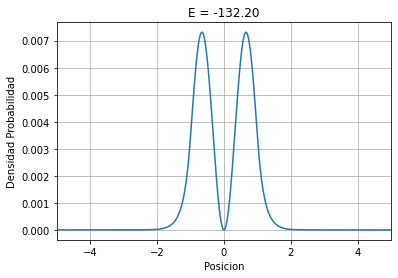

In [6]:
psi3 = SETI( V, v, x1, x2, -132.2, a, False )
psi3.graphFunOnda()
psi3.graphDenProb()

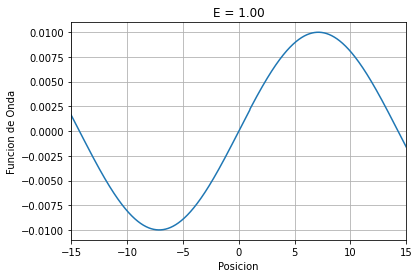

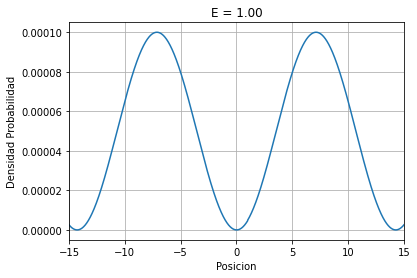

In [125]:
a=0
psi4 = SETI( V, v, x1, x2, 1.001, 0.0, False )
psi4.graphFunOnda()
psi4.graphDenProb()

In [7]:
newArray = np.fromiter((element for element in psi3.denProb() if element != 0),dtype = psi3.denProb().dtype)
newArray

array([4.70213123e-223, 1.88210260e-222, 4.23942184e-222, ...,
       3.91283826e-222, 1.73726281e-222, 4.34049396e-223])

In [8]:
x = np.append(x1, np.flip(x2))
I1 = integrate.simpson(newArray)
I1

1.0000000000000004

In [142]:
a = 2
l = SETD(0)

In [143]:
l.funOndaDep(7.919, 31.070, -219.49, 1, V, v, x1, x2, a)

array([0.00000000e+00+0.j, 2.09352637e-06+0.j, 1.66713243e-05+0.j, ...,
       7.84186872e-02+0.j, 3.92052510e-02+0.j, 0.00000000e+00+0.j])

In [144]:
u = l.denProbDep(7.919, 31.070, -219.49, 1, V, v, x1, x2,a)

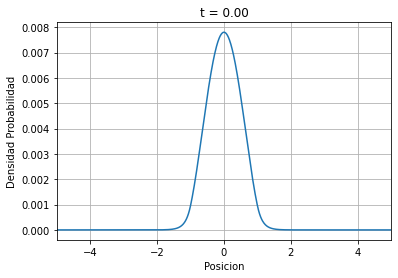

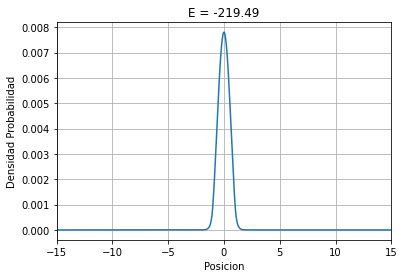

In [145]:
l.graphDenProbDep(7.919, 31.070, -219.49, 1, V, v, x1, x2,a)
psi1.graphDenProb()

In [146]:
newArray = np.fromiter((element for element in u if element != 0),dtype = u.dtype)
newArray

array([1.84409954e-293, 1.16941239e-291, 1.33161038e-290, ...,
       5.82371433e-284, 2.58741817e-284, 6.46719515e-285])

In [147]:
x = np.append(x1, np.flip(x2))
I1 = integrate.simpson(newArray)
I1

1.0000000000000002